***Capstone Two: Preprocessing and Training Data Development***

In this assignment, I will preprocess my data
- create dummy or indicator features for categorical variables
- standardize the magnitude of numeric features using a scaler
And I will split my data in training and test datasets. 

In [1]:
### I will import Necessary Libraries/Packages
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor

In [2]:
path = "/Users/shsu/Documents/GitHub/dsc/Unit 16 - Feature Engineering/16.3 Capstone Two - Pre-Processing and Training Data Development/HR-Employee-Attrition.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are three types of data in my dataset: numeric data (i.e., float, integer), categorical data (e.g., gender, education field, marital status), and ordinal data (e.g., distance from home, job satisfaction).
I will preprocess each of these data types separately. To do that, I will create three separate dataframes for each dtype from my main dataframe, preprocess them separately, and finally concatane them once preprocessing is complete. In the next step, I will split the preprocessed dataframe into training and test sets. 

In [5]:
#First, I will start with categorical features.  
#As a first step, I will check the values in Object columns 
obj_cols = df.select_dtypes(include=[object]).columns
for i in obj_cols:
    print(i,':', df[i].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [6]:
# The results show that all the object columns except BusinessTravel are categorical. Although BusinessTravel is an Object type in Python terms, it is an ordinal feature in nature. 
# Therefore, I will drop it from categorical dataframe and include it in my ordinal dataframe.

In [7]:
# Next, I will seperate my target feature Attrition from the dataset. I will add the target feature to the preprocessed dataframe at the end. 

In [8]:
Attrition = df[['Attrition']]
print(Attrition)

     Attrition
0          Yes
1           No
2          Yes
3           No
4           No
...        ...
1465        No
1466        No
1467        No
1468        No
1469        No

[1470 rows x 1 columns]


In [9]:
df.drop(columns='Attrition', axis=1, inplace=True)

In [10]:
# Next, I will explore my numeric columns. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
#There are some columns that need to be dropped from the numeric dataframe. These are EmployeeCount and EmployeeNumber.
#Also, categorical variable Over18 needs to be dropped since all employees are above 18 years of age. 

In [12]:
# I will drop the following columns because they are not useful.
df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber'], axis=1, inplace=True)

In [13]:
# Next I will create a  dataframe just for my ordinal variables. This is my first dataframe that I will create from the main dataframe. 
# Note: Originally, BusinessTravel was categorized as an Object dtype, while all he other ordinal features are labeled as numeric dtypes. I will map BusinessTravel to convert it numeric. 

In [14]:
ord_cols = ['BusinessTravel', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
            'JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
            'WorkLifeBalance']
df_ord=df[ord_cols]

In [15]:
df_ord['BusinessTravel'] = df_ord['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1,"Travel_Frequently":2})

<ipython-input-15-61e394e8c12c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['BusinessTravel'] = df_ord['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1,"Travel_Frequently":2})


In [16]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   BusinessTravel            1470 non-null   int64
 1   DistanceFromHome          1470 non-null   int64
 2   Education                 1470 non-null   int64
 3   EnvironmentSatisfaction   1470 non-null   int64
 4   JobInvolvement            1470 non-null   int64
 5   JobLevel                  1470 non-null   int64
 6   JobSatisfaction           1470 non-null   int64
 7   PerformanceRating         1470 non-null   int64
 8   RelationshipSatisfaction  1470 non-null   int64
 9   StockOptionLevel          1470 non-null   int64
 10  WorkLifeBalance           1470 non-null   int64
dtypes: int64(11)
memory usage: 126.5 KB


In [17]:
# Next, will create a new dataframe for Object features (i.e., categorical features). Then, I will add dummy variables for all object columns. 
df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.drop(columns='BusinessTravel')
df_cat = pd.get_dummies(df_cat)

In [18]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Department_Human Resources         1470 non-null   uint8
 1   Department_Research & Development  1470 non-null   uint8
 2   Department_Sales                   1470 non-null   uint8
 3   EducationField_Human Resources     1470 non-null   uint8
 4   EducationField_Life Sciences       1470 non-null   uint8
 5   EducationField_Marketing           1470 non-null   uint8
 6   EducationField_Medical             1470 non-null   uint8
 7   EducationField_Other               1470 non-null   uint8
 8   EducationField_Technical Degree    1470 non-null   uint8
 9   Gender_Female                      1470 non-null   uint8
 10  Gender_Male                        1470 non-null   uint8
 11  JobRole_Healthcare Representative  1470 non-null   uint8
 12  JobRole_Human Resour

In [19]:
# Next,  I will create my third dataframe for numeric features. 
# I will scale the numeric volumes to make them suitable for my future ML model. The histograms in the previous capstone notebook for numeric values don't look normally distributed.
# Before I do scaling, I will first separate numerical columns and save them under a new dataframe called dfn.
df_num = df.select_dtypes(include=['integer','float'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EnvironmentSatisfaction   1470 non-null   int64
 5   HourlyRate                1470 non-null   int64
 6   JobInvolvement            1470 non-null   int64
 7   JobLevel                  1470 non-null   int64
 8   JobSatisfaction           1470 non-null   int64
 9   MonthlyIncome             1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  NumCompaniesWorked        1470 non-null   int64
 12  PercentSalaryHike         1470 non-null   int64
 13  PerformanceRating         1470 non-null   int64
 14  RelationshipSatisfaction  1470 non-null 

In [20]:
ord_cols.remove('BusinessTravel')

In [21]:
df_num = df_num.drop(columns = ord_cols)



In [22]:
df_num.head()

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,40,3468,16632,9,12,6,3,2,2,2,2


In [23]:
scaler = MinMaxScaler() # I prefer using MinMaxScaler() to scale my dataframe
scaled = scaler.fit_transform(df_num)
dfn_scaled = pd.DataFrame(scaled)
num_cols = df_num.columns
dfn_scaled.columns = num_cols
dfn_scaled.head()

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.0,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.5,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.5,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.5,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.5,0.05,0.111111,0.133333,0.117647


In [24]:
# Now that I preprocessed ordinal, categorical, and numeric features, I can concat all of them into a new dataframe with the target feature. 

In [25]:
df_processed = pd.concat([Attrition, dfn_scaled, df_ord, df_cat], axis=1)
df_processed.Attrition = df_processed.Attrition.map({'Yes':1, 'No':0})
df_processed.head()

,Attrition,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0.547619,0.715820,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.0,...,0,0,0,1,0,0,0,1,0,1
1,0,0.738095,0.126700,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.5,...,0,0,1,0,0,0,1,0,1,0
2,1,0.452381,0.909807,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.5,...,0,0,0,0,0,0,0,1,0,1
3,0,0.357143,0.923407,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.5,...,0,0,1,0,0,0,1,0,0,1
4,0,0.214286,0.350036,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.5,...,0,0,0,0,0,0,1,0,1,0


array([[<AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsInCurrentRole'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>],
       [<AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:titl

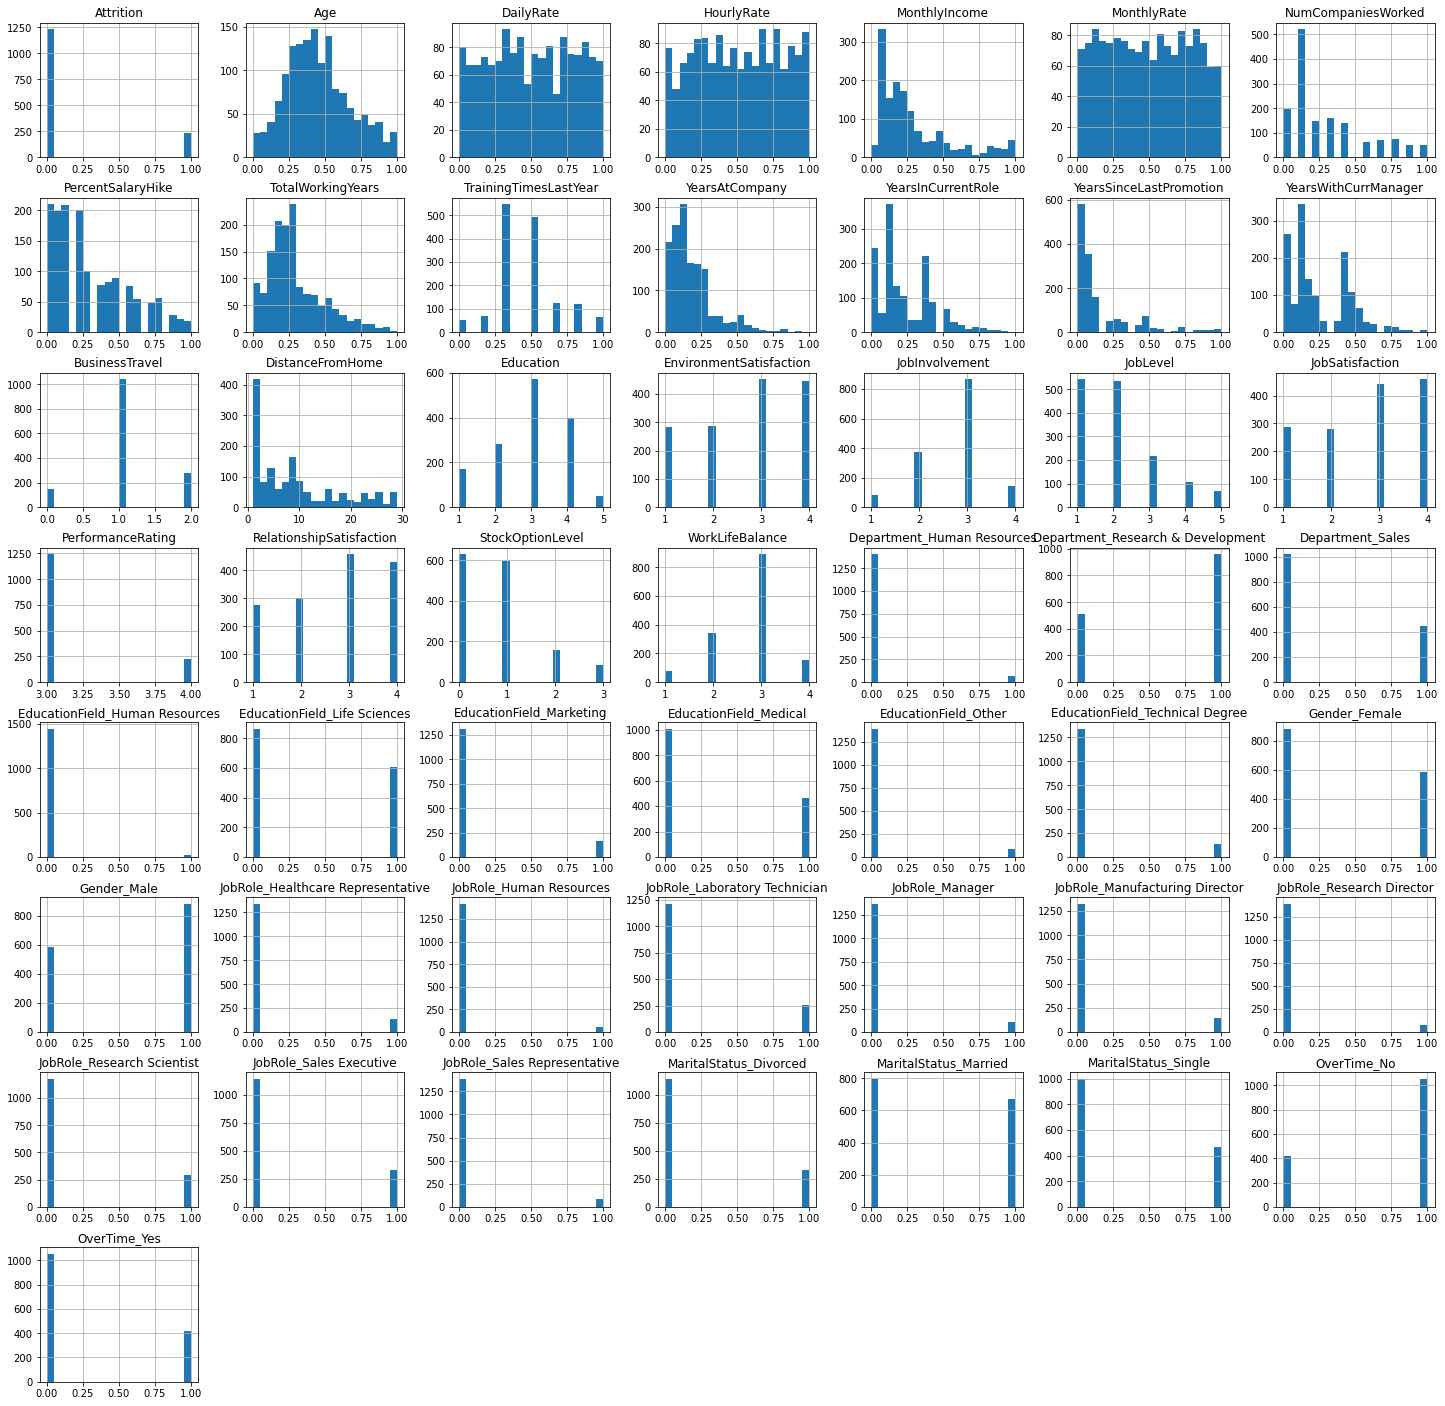

In [26]:
df_processed.hist(bins=20, figsize=(25, 25))

In [27]:
# All numeric and categorical columns have values between 0 and 1. Ordinal features have values as high as 4, which is not a significant variation from values in other feature columns. 
# I believe, the dataset is ready for a train/test split. 

In [28]:
### Now, I will do train/test split.

X_train, X_test, y_train, y_test = train_test_split(df_processed.drop(columns='Attrition'), 
                                                    df_processed.Attrition,
                                                    test_size=0.3,
                                                    random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 49), (441, 49), (1029,), (441,))

Capstone Two - Modeling
In this part of the Capstone assignment, I will build my model. 